<a href="https://colab.research.google.com/github/Umerfarooq122/Python-Projects/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Data Cleaning**


---
Data Cleaning is the process of transforming raw data into consistent data that can be analyzed. It is aimed at improving the content of statistical statements based on the data as well as their reliability. Data cleaning may profoundly influence the statistical statements based on the data.

**About the the Data set**

> This dataset includes information on food choices, nutrition, preferences, childhood favorites, and other information from college students. There are 126 responses from students. Data is raw and uncleaned. In this raw data, we have a categorical variables which have been encoded to Continuous variables for analysis. So, our major data cleaning task in here is to take care of the missing values and also to make sure there are no discrepancies in the encoded data

The Data set choosen for the data cleaning task is downloaded from Kaggle. Kaggle is an online community platform for data scientists and machine learning enthusiasts. Kaggle allows users to collaborate with other users, find and publish datasets, use GPU integrated notebooks, and compete with other data scientists to solve data science challenges.

After dowloading the data set, it was stored in a github repository from where it was loaded into notebook.





In [92]:
# Setting up the enviromnet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [93]:
# Loading the data set

df = pd.read_csv("https://raw.githubusercontent.com/Umerfarooq122/Data_sets/main/food_coded.csv")

# Displaying first 4 and last 4 rows

df.head(4)


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"


In [94]:
df.shape

(125, 61)

In [95]:
#Checking column name:

df.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

The column names look perfectly fine and meaningful. Let's create a list of columns that contains the missing values

In [96]:
# Saving the columns that has missing values
cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]

In [97]:
# Printing the names of columns and number of missing values in that column
for i in cols_with_missing:
    print(i,df[i].isnull().sum())

GPA 2
calories_day 19
calories_scone 1
comfort_food 1
comfort_food_reasons 1
comfort_food_reasons_coded 19
cook 3
cuisine 17
diet_current 1
drink 2
eating_changes 3
employment 9
exercise 13
father_education 1
father_profession 3
fav_cuisine 2
fav_food 2
food_childhood 1
healthy_meal 1
ideal_diet 1
income 1
life_rewarding 1
marital_status 1
meals_dinner_friend 3
mother_education 3
mother_profession 2
on_off_campus 1
persian_food 1
self_perception_weight 1
soup 1
sports 2
tortilla_calories 1
type_sports 21
weight 2


We can see that some column like `type_sport`,`exercise`,`cuisine` e.t.c has a lot of missing data if we remove them from data frame, we will be missing out on a lot of information. So lets replace the missing values in those column by meaningful replacement using `fill.na()`.

In [98]:
df['calories_day'].fillna(1,inplace=True)
df['comfort_food_reasons_coded'].fillna(9,inplace=True)
df['cuisine'].fillna(6,inplace=True)
df['employment'].fillna(4,inplace=True)
df['exercise'].fillna(5,inplace=True)
df['type_sports'].fillna('Nothing',inplace=True)


After replacing the values in columns with a lot of missing values. Lets reomve the other missing values

In [99]:
# Removing missing values
for i in cols_with_missing:
    df = df[~df[i].isnull()]

In [100]:
# Checking the shape of data frame after the removing the missing values
df.shape

(101, 61)

We can see that some of the rows have been removed because of missing values. Let me just check the data type of columns if there are any bogus values or data type. I will use `decribe()` function to see if all the numeric data is defined as int or float.

In [101]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,1.376238,1.099010,588.465347,2.792079,494.158416,1.742574,3.613861,2.722772,2.584158,1.950495,...,2.801980,3.148515,1.217822,1.356436,3.336634,950.693069,570.940594,4.039604,1.485149,1080.000000
std,0.486857,0.300165,122.089604,0.909031,214.860500,0.439397,2.939287,1.068820,1.872257,1.818660,...,1.385784,1.152269,0.414824,0.481335,1.444141,201.003768,150.536894,1.066966,0.502272,244.726378
min,1.000000,1.000000,265.000000,1.000000,315.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,610.000000,2.000000,420.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.000000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,4.000000,940.000000,500.000000,4.000000,1.000000,1315.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.000000,5.000000,3.000000,3.000000,2.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.000000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


`Describe()` Function displays the summary statistics for all the columns that has numeric data. Over here if we look closely `GPA` column is missing in the summary statistics which means that either the data type is  not properly or it may have some another type of data mixed into the whole column. In order to confirm what kind of data to we have in `GPA` let's check out the the whole column. I will use `value_counts()` which counts the uniques values.

In [102]:
df['GPA'].value_counts()

3.5           10
3             10
3.3            9
3.2            9
3.7            8
3.4            7
3.6            7
3.8            6
2.8            4
3.9            4
4              3
3.1            2
3.68           1
3.92           1
2.6            1
3.83           1
3.75           1
2.4            1
Unknown        1
3.73           1
3.77           1
3.63           1
3.79 bitch     1
3.89           1
3.67           1
Personal       1
3.35           1
3.605          1
2.9            1
3.654          1
3.65           1
3.904          1
2.25           1
3.882          1
Name: GPA, dtype: int64

Now we  can see that there are some unwanted words in the column so we get of those to make our data set even more cleaner.

In [103]:
df.dropna(subset=['GPA'],inplace=True)
df['GPA_new'] = df['GPA'].str.replace(".","")
df = df[~df['GPA_new'].str.isdigit() == False]
df['GPA'] = df['GPA'].astype(float)
df.drop('GPA_new',axis=1,inplace=True)

<ipython-input-103-dfa58d7c6482>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['GPA_new'] = df['GPA'].str.replace(".","")
<ipython-input-103-dfa58d7c6482>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GPA'] = df['GPA'].astype(float)
<ipython-input-103-dfa58d7c6482>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('GPA_new',axis=1,inplace=True)


In [104]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,1.0,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,Nothing,3,1,1315,"Not sure, 240"
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


We can see that the data frame looks fine. Let's check out the shape of data frame. We are expecting to loose a few more rows

In [105]:
df.shape

(98, 61)

Similarly, we can check the remaining columns. I will comment the columns out which does not have any problem with the values and include those which does.

In [106]:
df['Gender'].value_counts()

1    61
2    37
Name: Gender, dtype: int64

In [107]:
df['breakfast'].value_counts()

1    88
2    10
Name: breakfast, dtype: int64

In [108]:
df['calories_chicken'].value_counts()

610    49
720    25
430    19
265     5
Name: calories_chicken, dtype: int64

In [109]:
df['calories_day'].value_counts()

3.0    52
4.0    19
2.0    14
1.0    13
Name: calories_day, dtype: int64

In [110]:
df['calories_scone'].value_counts()

420.0    69
980.0    15
315.0    14
Name: calories_scone, dtype: int64

In [111]:
df['coffee'].value_counts()

2    72
1    26
Name: coffee, dtype: int64

In [112]:
df['comfort_food'].value_counts()

none                                                       1
Macaroni and cheese, chicken noodle soup, pizza            1
carrots, plantain chips, almonds, popcorn                  1
pizza, pasta, mac and cheese                               1
Chinese food, moes, sponge candy, homemade lasagne         1
                                                          ..
pizza, doughnuts, mcdonalds                                1
mac n cheese, peanut butter and banana sandwich, omelet    1
french fries, chips, ice cream                             1
chips and dip, pepsi,                                      1
Mac n Cheese, Lasagna, Pizza                               1
Name: comfort_food, Length: 98, dtype: int64

In [113]:
df['comfort_food_reasons'].value_counts()

Boredom                                          3
Boredom                                          3
boredom                                          3
boredom, sadness                                 2
stress, boredom                                  2
                                                ..
Usually if I'm sad or depressed.                 1
No reasons                                       1
boredom, stress                                  1
Stress                                           1
happiness, they are some of my favorite foods    1
Name: comfort_food_reasons, Length: 87, dtype: int64

In [114]:
df['comfort_food_reasons_coded'].value_counts()

2.0    36
1.0    21
9.0    19
3.0    12
7.0     3
5.0     3
4.0     2
6.0     1
8.0     1
Name: comfort_food_reasons_coded, dtype: int64

In [115]:
df['cook'].value_counts()

3.0    39
2.0    28
1.0    12
4.0    12
5.0     7
Name: cook, dtype: int64

In [116]:
df['cuisine'].value_counts()

1.0    71
6.0    14
2.0     9
4.0     2
3.0     1
5.0     1
Name: cuisine, dtype: int64

In [117]:
df['diet_current'].value_counts()

eat good and exercise                                                                                                                                   1
I eat very basic foods like pizza and pasta. I don't try many new things.                                                                               1
i currently eat a lot of salad, but do not eat 3 times a day nor eat breakfast                                                                          1
I try to eat healthy but sometimes drink soda pop and I enjoy desserts. harder to eat healthy when I am at school.                                      1
Eat fruits and vegetables daily and with almost every meal. Diet mostly consists of meat as well.                                                       1
                                                                                                                                                       ..
I eat out more often then not. I try to make sure when I eat out it isn't fa

In [118]:
df['diet_current_coded'].value_counts()

2    44
1    42
3    10
4     2
Name: diet_current_coded, dtype: int64

In [119]:
df['drink'].value_counts()

2.0    54
1.0    44
Name: drink, dtype: int64

In [120]:
df['eating_changes'].value_counts()

eat faster                                                                                                         1
Home cooked meals and a lot more difficult to have at college. It's typically quick, on the go foods.              1
I have been eating healthier especially vegetables and proteinous food                                             1
less healthy because of less options, money and time.                                                              1
Less snacking                                                                                                      1
                                                                                                                  ..
I do not snack as often at school. I find that I'm always busy so sometimes I don't have a lot of time to eat.     1
My diet is more limited just because of what I have time to make                                                   1
poor                                                            

In [121]:
df['eating_changes_coded'].value_counts()

1    62
2    27
3     6
4     3
Name: eating_changes_coded, dtype: int64

In [122]:
df['eating_changes_coded1'].value_counts()

3     37
5     24
2     13
4      7
8      4
10     3
11     3
7      2
1      1
6      1
9      1
13     1
12     1
Name: eating_changes_coded1, dtype: int64

In [123]:
df['eating_out'].value_counts()

2    50
3    19
1    10
5    10
4     9
Name: eating_out, dtype: int64

In [124]:
df['employment'].value_counts()

2.0    48
3.0    43
4.0     5
1.0     2
Name: employment, dtype: int64

In [125]:
df['ethnic_food'].value_counts()

5    33
4    30
2    17
3    14
1     4
Name: ethnic_food, dtype: int64

In [126]:
df['exercise'].value_counts()

1.0    49
2.0    32
3.0     9
5.0     8
Name: exercise, dtype: int64

In [127]:
df['father_education'].value_counts()

4.0    37
2.0    25
5.0    21
3.0    12
1.0     3
Name: father_education, dtype: int64

In [128]:
df['father_profession'].value_counts()

Dentist                              2
IT                                   2
Teacher                              2
Construction                         2
business owner                       2
                                    ..
Corporate Manager                    1
Biohemical Waste Elimination         1
Optometrist                          1
Owns his own promotional company     1
Store manager at Giant Eagle         1
Name: father_profession, Length: 92, dtype: int64

In [129]:
df['fav_cuisine'].value_counts()

Italian                                     16
Italian                                     14
italian                                      6
Mexican                                      4
American                                     3
Chinese                                      3
American                                     3
Chinese                                      2
Asian                                        2
Mexican                                      2
italian                                      2
Thai                                         2
Korean                                       2
mac and cheese                               1
Vietnamese cuisine                           1
american                                     1
Japanese                                     1
I do not like cuisine                        1
Mexican cuisine                              1
Asian                                        1
Chinese food                                 1
Indian food  

In [130]:
df['fav_cuisine_coded'].value_counts()

1    47
4    20
5    14
2     7
0     3
8     3
3     2
6     1
7     1
Name: fav_cuisine_coded, dtype: int64

In [131]:
df['fav_food'].value_counts()

1.0    60
3.0    32
2.0     6
Name: fav_food, dtype: int64

In [132]:
df['food_childhood'].value_counts()

Pizza                            3
Mac and cheese                   2
Steak                            2
Spaghetti                        2
Chicken                          2
                                ..
chicken parmesan                 1
Pasta                            1
pizza, pasta, grilled cheese     1
chicken, pasta, stir fry         1
pizza and spaghetti              1
Name: food_childhood, Length: 92, dtype: int64

In [133]:
df['fries'].value_counts()

1    88
2    10
Name: fries, dtype: int64

In [134]:
df['fruit_day'].value_counts()

5    56
4    25
3    13
2     3
1     1
Name: fruit_day, dtype: int64

In [135]:
df['grade_level'].value_counts()

1    29
2    28
4    21
3    20
Name: grade_level, dtype: int64

In [136]:
df['greek_food'].value_counts()

5    31
3    25
4    20
1    13
2     9
Name: greek_food, dtype: int64

In [137]:
df['healthy_feeling'].value_counts()

5     12
7     12
8     12
4     11
3     11
2     10
6     10
9      9
1      6
10     5
Name: healthy_feeling, dtype: int64

In [138]:
df['healthy_meal'].value_counts()

looks not oily                                                                                  1
Very colorful and smaller portions of the unhealthy food with larger portions of vegetables     1
Healthy meal for me is a food rich in protein, fiber, some sort of carbohydrates                1
lots of variety and veggies                                                                     1
Small portion of meat with majority fruits or vegetables                                        1
                                                                                               ..
a meal with a meat, vegetable, grain, and fruit                                                 1
Some kind of protein, a vegetable, and a grain                                                  1
a lot of greens                                                                                 1
4-6 ounces chicken or fish, side of potatoes, and green beans                                   1
A protein, a fruit, 

In [139]:
df['ideal_diet'].value_counts()

being healthy                                                                                                        1
Ideally I would eat more fruits and vegetables in my diet along with some junk food.                                 1
it would be a vegetarian diet without any red meat                                                                   1
Eating healthy with lots of water and natural foods.                                                                 1
More organic food. Want to try and add more seafood into my diet.                                                    1
                                                                                                                    ..
I wish I had the time and energy to cook more at home on my own.                                                     1
Pretty much what I eat now                                                                                           1
healthy and protien                             

In [140]:
df['ideal_diet_coded'].value_counts()

2    33
7    13
5    13
3    11
1    11
6    10
4     5
8     2
Name: ideal_diet_coded, dtype: int64

In [141]:
df['income'].value_counts()

6.0    37
5.0    23
4.0    18
3.0    11
1.0     5
2.0     4
Name: income, dtype: int64

In [142]:
df['indian_food'].value_counts()

5    28
3    26
1    20
4    12
2    12
Name: indian_food, dtype: int64

In [143]:
df['italian_food'].value_counts()

5    79
4    13
3     6
Name: italian_food, dtype: int64

In [144]:
df['life_rewarding'].value_counts()

1.0     17
8.0     14
2.0     11
3.0     11
9.0     10
10.0     9
7.0      8
5.0      8
4.0      6
6.0      4
Name: life_rewarding, dtype: int64

In [145]:
df['marital_status'].value_counts()

1.0    51
2.0    47
Name: marital_status, dtype: int64

In [146]:
df['meals_dinner_friend'].value_counts()

Chicken, Steak, Pasta                                     2
rice, chicken,  soup                                      1
Pasta, chicken, pizza                                     1
Rice with vegetables, chicken with pasta, salad           1
Pasta, pizza, and chicken                                 1
                                                         ..
spaghetti or pasta, shrimp fried rice, chicken            1
Some kind of pasta, a chicken dish, some kind of salad    1
pasta, lasagna, chicken                                   1
Tomato soup, Steak, crab                                  1
Pizza, Spaghetti, Baked Ziti                              1
Name: meals_dinner_friend, Length: 97, dtype: int64

In [147]:
df['mother_education'].value_counts()

4.0    38
2.0    23
5.0    19
3.0    15
1.0     3
Name: mother_education, dtype: int64

In [148]:
df['mother_profession'].value_counts()

Teacher                                      3
Nurse                                        2
Banker                                       2
Secretary                                    2
unemployed                                   1
                                            ..
Works in retail                              1
stylist                                      1
management                                   1
Strategic Planning and Programs Manager      1
Receptionist for a medical supply company    1
Name: mother_profession, Length: 93, dtype: int64

In [149]:
df['nutritional_check'].value_counts()

4    33
2    32
3    15
5    12
1     6
Name: nutritional_check, dtype: int64

In [150]:
df['on_off_campus'].value_counts()

1.0    78
2.0    15
3.0     4
4.0     1
Name: on_off_campus, dtype: int64

In [151]:
df['parents_cook'].value_counts()

1    62
2    29
3     6
5     1
Name: parents_cook, dtype: int64

In [152]:
df['pay_meal_out'].value_counts()

3    57
4    18
2    11
5     7
6     5
Name: pay_meal_out, dtype: int64

In [153]:
df['persian_food'].value_counts()

3.0    24
1.0    22
2.0    21
5.0    17
4.0    14
Name: persian_food, dtype: int64

In [154]:
df['self_perception_weight'].value_counts()

3.0    35
4.0    25
2.0    24
6.0     5
1.0     5
5.0     4
Name: self_perception_weight, dtype: int64

In [155]:
df['soup'].value_counts()

1.0    78
2.0    20
Name: soup, dtype: int64

In [156]:
df['sports'].value_counts()

1.0    64
2.0    34
Name: sports, dtype: int64

In [157]:
df['thai_food'].value_counts()

5    29
4    21
3    19
1    16
2    13
Name: thai_food, dtype: int64

In [158]:
df['tortilla_calories'].value_counts()

1165.0    37
940.0     34
725.0     17
580.0     10
Name: tortilla_calories, dtype: int64

In [159]:
df['turkey_calories'].value_counts()

500    39
690    34
345    17
850     8
Name: turkey_calories, dtype: int64

In [160]:
df['type_sports'].value_counts()

Nothing                                                        11
none                                                            7
Hockey                                                          6
softball                                                        4
None                                                            4
Soccer                                                          3
Softball                                                        3
soccer                                                          3
Volleyball                                                      3
Wrestling                                                       2
Basketball                                                      2
Lacrosse                                                        2
Lacrosse                                                        2
Ice hockey                                                      2
field hockey                                                    2
hockey    

In [161]:
df['veggies_day'].value_counts()

5    43
4    29
3    15
2     9
1     2
Name: veggies_day, dtype: int64

In [162]:
df['vitamins'].value_counts()

1    49
2    49
Name: vitamins, dtype: int64

In [163]:
df['waffle_calories'].value_counts()

1315    48
900     30
760     19
575      1
Name: waffle_calories, dtype: int64

In [164]:
df['weight'].value_counts()

140                         7
150                         6
135                         6
190                         5
155                         5
175                         5
170                         5
185                         5
145                         4
130                         4
165                         4
125                         4
200                         3
180                         3
120                         3
129                         2
210                         2
160                         2
113                         2
167                         2
144 lbs                     1
260                         1
184                         1
192                         1
128                         1
138                         1
187                         1
169                         1
168                         1
205                         1
105                         1
123                         1
264                         1
110       

In [165]:
df = df[df['weight'].str.isdigit()]

In [166]:
df['weight'].value_counts()

140    7
135    6
150    6
190    5
155    5
175    5
185    5
170    5
165    4
125    4
130    4
145    4
120    3
200    3
180    3
129    2
160    2
167    2
113    2
210    2
260    1
184    1
128    1
138    1
192    1
187    1
205    1
169    1
168    1
105    1
123    1
264    1
110    1
116    1
137    1
156    1
Name: weight, dtype: int64

In [167]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,1.0,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
5,2.250,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4.0,...,1.0,2.0,4,940.0,345,None.,1,2,1315,190
6,3.800,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,...,1.0,1.0,5,940.0,690,soccer,4,1,1315,180


In [168]:
df.shape

(95, 61)

Let's make a few plot to see if everything is working good. Just for the record these plot are not aimed at anything nor do they convey or highlight any important things.

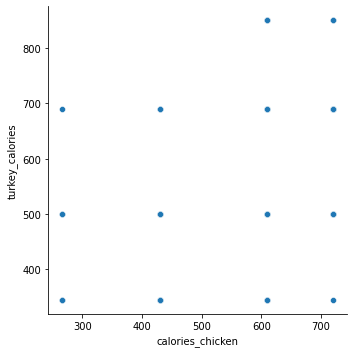

In [169]:
sns.relplot(
    data=df,
    x="calories_chicken", y="turkey_calories"
)

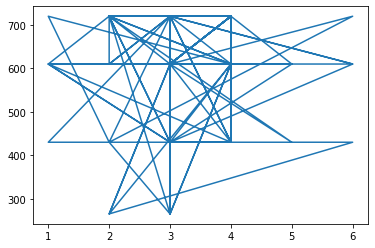

In [170]:
plt.plot(df['self_perception_weight'],df['calories_chicken'])